# Chapter 6: Mophological Image Processing


## Alogrithm: Erosion and Dilation

#### 1\. **Erosion (Errosion)**

**Erosion** (xói mòn) là phép toán làm giảm kích thước của các đối tượng sáng (trắng) trong ảnh nhị phân, đồng thời làm mở rộng vùng tối (đen). Kết quả của phép toán này là ảnh mới mà trong đó, các đối tượng sáng sẽ bị "co lại", thu nhỏ về kích thước.

**Cách thức hoạt động:**

*   Erosion kiểm tra từng pixel trong ảnh và xem xét tất cả các pixel lân cận trong khu vực xung quanh (theo kích thước của kernel).
    
*   Nếu tất cả các pixel trong khu vực xung quanh đều là sáng (trắng), pixel trung tâm sẽ được giữ lại. Ngược lại, nếu có bất kỳ pixel nào trong vùng lân cận là tối (đen), pixel trung tâm sẽ bị xóa (biến thành đen).
    



In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as pylab
from skimage.morphology import binary_erosion, rectangle

def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks
    

im = rgb2gray(imread('../images/clock2.jpg'))



Chuyển ảnh grayscale thành ảnh nhị phân (binary image) bằng cách sử dụng một ngưỡng (threshold) cố định là 0.5.

*   Các pixel có giá trị nhỏ hơn hoặc bằng 0.5 sẽ được gán giá trị 0 (đen).
    
*   Các pixel có giá trị lớn hơn 0.5 sẽ được gán giá trị 1 (trắng).

**binary\_erosion(im, rectangle(1,5))**: Áp dụng phép toán erosion lần nữa nhưng lần này sử dụng kernel có kích thước 1x5, tức là một hình chữ nhật dài hơn. Việc này sẽ làm giảm kích thước của các đối tượng sáng (trắng) trong ảnh một cách mạnh mẽ hơn so với kernel 1x5.

In [ ]:
im[im <= 0.5] = 0 # create binary image with fixed threshold 0.5
im[im > 0.5] = 1

im1 = binary_erosion(im, rectangle(1,5))

Hiển Thị Ảnh

<Figure size 640x480 with 0 Axes>

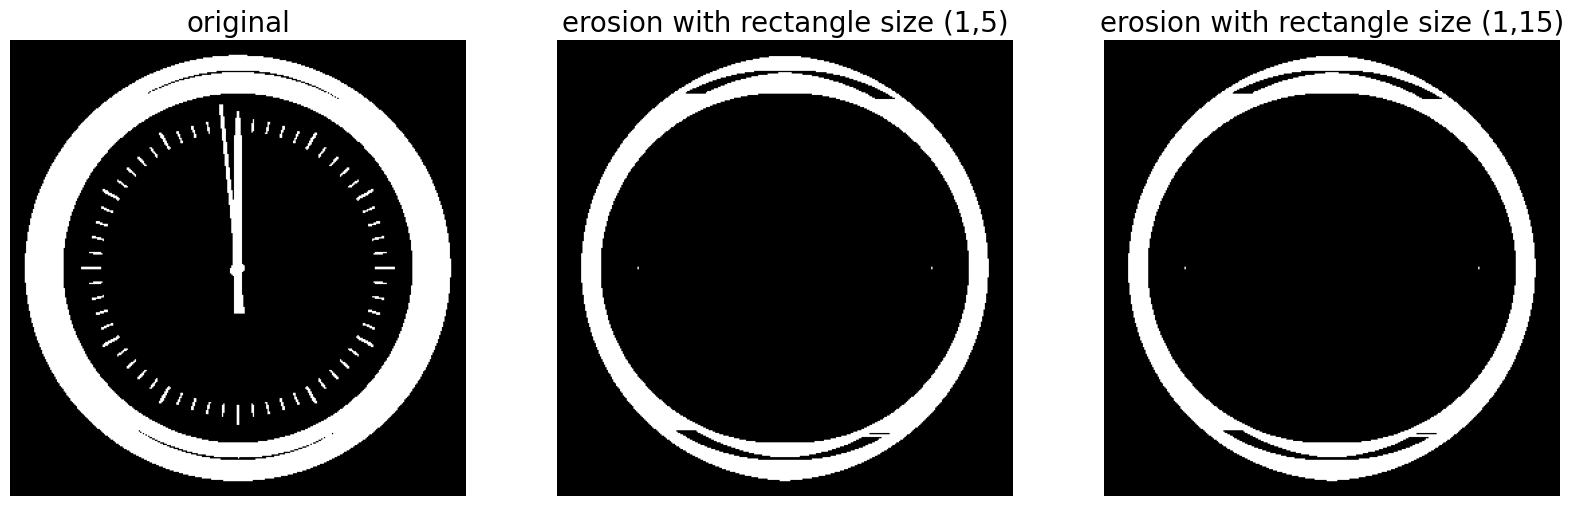

In [3]:

pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1), plot_image(im, 'original')
pylab.subplot(1,3,2), plot_image(im1, 'erosion with rectangle size (1,5)')
im1 = binary_erosion(im, rectangle(1,15))
pylab.subplot(1,3,3), plot_image(im1, 'erosion with rectangle size (1,15)')
pylab.show()


#### **2\. Dilation**

**Dilation** là phép toán ngược lại với Erosion. Nó làm tăng kích thước của các đối tượng sáng (trắng) trong ảnh nhị phân, làm chúng trở nên lớn hơn và mở rộng. Kết quả của phép toán này là ảnh mới mà trong đó các đối tượng sáng sẽ "phình to", và các vùng tối (đen) sẽ được thu hẹp lại.

**Cách thức hoạt động:**

*   Dilation kiểm tra từng pixel trong ảnh và xem xét tất cả các pixel lân cận trong khu vực xung quanh (theo kích thước của kernel).
    
*   Nếu bất kỳ pixel nào trong vùng lân cận là sáng (trắng), pixel trung tâm sẽ được chuyển thành sáng (trắng).

In [4]:
from skimage.morphology import binary_dilation, disk
from skimage import img_as_float
im = img_as_float(imread('../images/tagore.png'))
im = 1 - im[...,3]
im[im <= 0.5] = 0
im[im > 0.5] = 1


<Figure size 640x480 with 0 Axes>

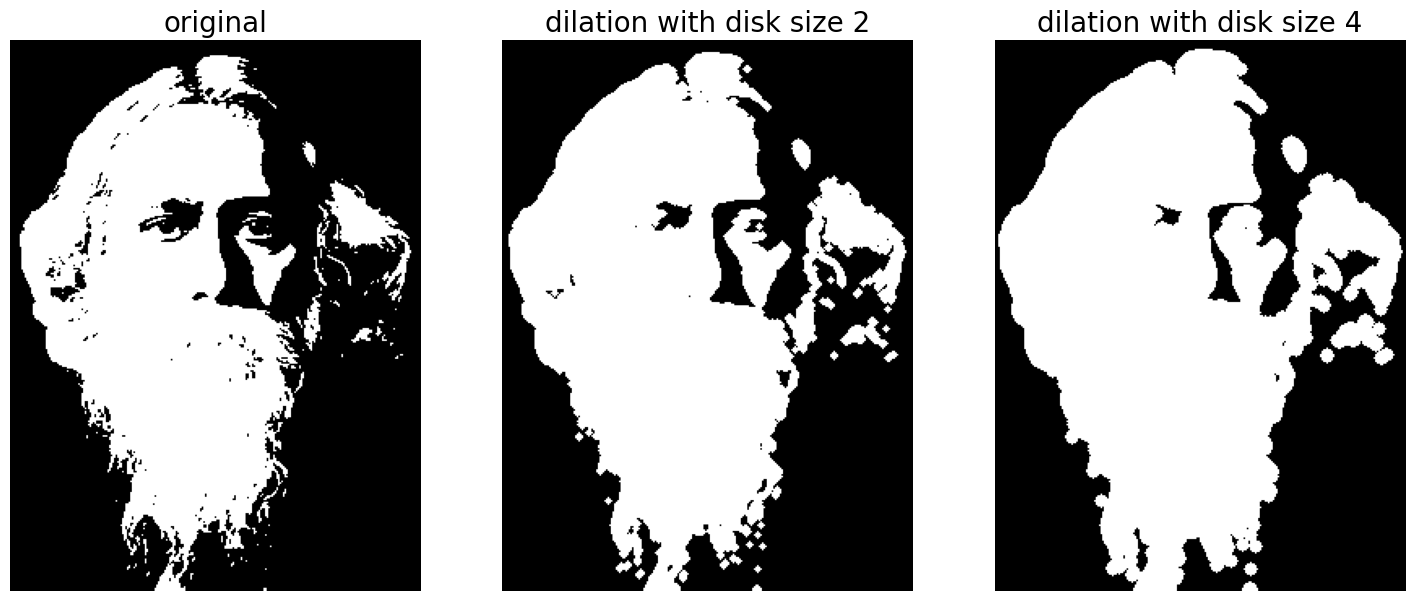

In [5]:
pylab.gray()
pylab.figure(figsize=(18,9))
pylab.subplot(131)
pylab.imshow(im)
pylab.title('original', size=20)
pylab.axis('off')
for d in range(1,3):
    pylab.subplot(1,3,d+1)
    im1 = binary_dilation(im, disk(2*d))
    pylab.imshow(im1)
    pylab.title('dilation with disk size ' + str(2*d), size=20)
    pylab.axis('off')
pylab.show() 